# 4. Análise de Posição
Professor Paulo Victor <br>
e-mail: paulo.gomes@cefet-rj.br <br>
CEFET/RJ Campus Angra dos Reis - Sala 6E
<br>
<br>
*Este material é um resumo do livro* **Cinemática e Dinâmica dos Mecanismos** *do autor Robert L. Norton, Editora AMGH, publicado em 2010, de modo a servir apenas como um guia para estudos e para as aulas. Este material não substitui a leitura do livro.* 

Uma vez que um projeto de mecanismo tenha sido **sintetizado**, ele deve ser **analisado**. <br>
O principal objetivo de uma análise cinemática é determinar as acelerações de todas as partes móveis do conjunto. **Forças Dinâmicas** são proporcionais à aceleração conforme a segunda lei de Newton. Precisamos conhecer as forças dinâmicas para calcularmos as **tensões** nos componentes.

![](figs4-0.jpg)

## 4.1 Sistemas de Coordenadas

* Sistema de coordenadas global ou absoluto
* Sistema de coordenadas local

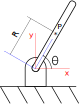

In [1]:
from IPython.display import SVG
SVG('figs4-1.svg')

In [2]:
from sympy import *

In [3]:
import sympy.physics.mechanics as me

In [4]:
N = me.ReferenceFrame('N')
A = me.ReferenceFrame('A')

In [5]:
theta = me.dynamicsymbols('theta') 

In [6]:
A.orient(N,'Axis',[theta,N.z])

## 4.2 Posição e Deslocamento

### Posição

A posição de um ponto no **plano** pode ser definida por meio de um **vetor posição**. <br>
A escolha dos **eixos de referência** é arbritrária, selecionada para satisfazer o observador. <br>
Um vetor de duas dimensões tem dois atributos, que podem ser expressos tento na forma *polar* quanto em *coordenadas cartesianas*. 
* forma polar
    * fornece o módulo e o ângulo do vetor: $\vec{p} = | R | @ \angle \theta$
* forma cartesiana
    * fornece os componentes X e Y do vetor: $\vec{p} = R_x,R_y$
Observa-se que:
$$ R = \sqrt{R_x^2 + R_y^2}$$
$$ \theta = arctan \left( \dfrac{R_y}{R_x} \right)$$

### Transformação de Coordenadas
Muitas vezes, é necessário transformar as coordenadas de um ponto definido em um sistema para coordenadas em outro. 

In [7]:
R = symbols('R')

In [8]:
p = R*A.x
p

R*A.x

In [9]:
p.express(N)

R*cos(theta)*N.x + R*sin(theta)*N.y

In [10]:
A.dcm(N) # matriz de rotação de A em relação a N, ou seja, leva de N para A

Matrix([
[ cos(theta(t)), sin(theta(t)), 0],
[-sin(theta(t)), cos(theta(t)), 0],
[             0,             0, 1]])

In [11]:
N.dcm(A) # matriz de rotação que leva de A para N

Matrix([
[cos(theta(t)), -sin(theta(t)), 0],
[sin(theta(t)),  cos(theta(t)), 0],
[            0,              0, 1]])

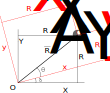

In [12]:
SVG('figs4-2.svg')

In [13]:
Rx,Ry,delta = symbols('R_x R_y delta')

In [14]:
B = me.ReferenceFrame('B')
B.orient(N,'Axis',[delta,N.z])

In [15]:
p = Rx*B.x + Ry*B.y
p

R_x*B.x + R_y*B.y

In [16]:
p.express(N)

(R_x*cos(delta) - R_y*sin(delta))*N.x + (R_x*sin(delta) + R_y*cos(delta))*N.y

In [17]:
N.dcm(B) 

Matrix([
[cos(delta), -sin(delta), 0],
[sin(delta),  cos(delta), 0],
[         0,           0, 1]])

In [18]:
p.express(B).args[0][0]

Matrix([
[R_x],
[R_y],
[  0]])

In [19]:
N.dcm(B)*(p.express(B).args[0][0])

Matrix([
[R_x*cos(delta) - R_y*sin(delta)],
[R_x*sin(delta) + R_y*cos(delta)],
[                              0]])

In [20]:
RX = p.express(N).args[0][0][0]
RX

R_x*cos(delta) - R_y*sin(delta)

In [21]:
RX = symbols('R_X')
Eq(RX,p.express(N).args[0][0][0])

Eq(R_X, R_x*cos(delta) - R_y*sin(delta))

In [22]:
RY = p.dot(N.y)
RY

R_x*sin(delta) + R_y*cos(delta)

In [23]:
RY = symbols('R_Y')
Eq(RY,p.dot(N.y))

Eq(R_Y, R_x*sin(delta) + R_y*cos(delta))

### Deslocamentos
O vetor posição $\vec{R}_{BA}$ define o deslocamento do ponto $B$ em relação ao ponto $A$. 

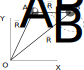

In [24]:
SVG('figs4-3.svg')

A posição de $B$ em consideração a $A$ é igual a posição absoluta de $B$ menos a posição absoluta de $A$
$$\vec{R}_{BA} = \vec{R}_B - \vec{R}_A$$
Ou:
$$\vec{R}_{BA} = \vec{R}_{BO} - \vec{R}_{AO}$$

## 4.3 Translação, Rotação e Movimento Complexo

#### Translação
Todos os pontos do corpo tem o mesmo deslocamento. A orientação angular é mantida.
#### Rotação 
Diferentes pontos do corpo suportam difenrentes deslocamentos, portanto há uma diferença de deslocamento entre quaisquer dois pontos escolhidos
#### Movimento complexo
É a união dos dois movimentos anteriores

#### Teoremas:
**Teorema de Euler** <br>
O deslocamento geral de um corpo rígido com um ponto fixo é igual a rotação relacionada a algum eixo.<br>
**Teorema de Chasles** <br>
Qualquer deslocamento de um corpo rígido é equivalente à soma da translação de qualquer ponto naquele corpo com rotação sobre um eixo por meio desse ponto.

## 4.4 Análise Gráfica da Posição de Mecanismos

Para qualquer mecanismo de um GDL, somente um parâmetro é necessário para definir a posição de todos os elos. O parâmetro usualmente escolhido é o ângulo do elo de entrada.<br>
Os comprimentos dos elos $a$, $b$, $c$ e $d$ são conhecidos.

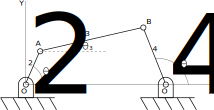

In [25]:
SVG('figs4-4.svg')

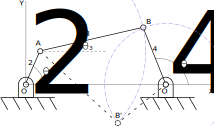

In [26]:
SVG('figs4-5.svg')

## 4.5 Análise Algébrica da Posição de Mecanismos

A mesma ideia pode ser utilizada para se fazer a análise algébrica do mecanismo de 4 barras.

In [27]:
theta2,a,b,c,d = symbols('theta2 a b c d')

In [28]:
Ax = a*cos(theta2)
Ax

a*cos(theta2)

In [29]:
Ay = a*sin(theta2)
Ay

a*sin(theta2)

Escrevendo as duas equações dos círculos com centros em $A$ e $O_4$ e com os respectivos raios $b$ e $c$:

In [30]:
Bx,By = symbols('B_x B_y')

In [31]:
b2 = (Bx - Ax)**2 + (By - Ay)**2
Eq1 = Eq(b**2,b2)
Eq1

Eq(b**2, (B_x - a*cos(theta2))**2 + (B_y - a*sin(theta2))**2)

In [32]:
Eq1 = b2 - b**2
Eq1

-b**2 + (B_x - a*cos(theta2))**2 + (B_y - a*sin(theta2))**2

In [33]:
c2 = (Bx - d)**2 + By**2
Eq2 = Eq(c**2,c2)
Eq2

Eq(c**2, B_y**2 + (B_x - d)**2)

In [34]:
Eq2 = c2 - c**2
Eq2

B_y**2 - c**2 + (B_x - d)**2

In [35]:
Eq3 = Eq1 - Eq2
Eq3

-B_y**2 - b**2 + c**2 - (B_x - d)**2 + (B_x - a*cos(theta2))**2 + (B_y - a*sin(theta2))**2

In [36]:
expand(Eq3)

-2*B_x*a*cos(theta2) + 2*B_x*d - 2*B_y*a*sin(theta2) + a**2*sin(theta2)**2 + a**2*cos(theta2)**2 - b**2 + c**2 - d**2

In [37]:
solBx = solve(Eq3,Bx)[0]
solBx

(-2*B_y*a*sin(theta2) + a**2 - b**2 + c**2 - d**2)/(2*(a*cos(theta2) - d))

In [38]:
Eq4 = Eq2.subs(Bx,solBx)
Eq4

B_y**2 - c**2 + (-d + (-2*B_y*a*sin(theta2) + a**2 - b**2 + c**2 - d**2)/(2*(a*cos(theta2) - d)))**2

In [39]:
solBy = solve(Eq4,By)
solBy

[(a*(a**2 - 2*a*d*cos(theta2) - b**2 + c**2 + d**2)*sin(theta2) + (-a*cos(theta2) + d)*sqrt(-a**4 + 4*a**3*d*cos(theta2) + 2*a**2*b**2 + 2*a**2*c**2 + 4*a**2*d**2*sin(theta2)**2 - 6*a**2*d**2 - 4*a*b**2*d*cos(theta2) - 4*a*c**2*d*cos(theta2) + 4*a*d**3*cos(theta2) - b**4 + 2*b**2*c**2 + 2*b**2*d**2 - c**4 + 2*c**2*d**2 - d**4))/(2*(a**2 - 2*a*d*cos(theta2) + d**2)),
 (a*(a**2 - 2*a*d*cos(theta2) - b**2 + c**2 + d**2)*sin(theta2) + (a*cos(theta2) - d)*sqrt(-a**4 + 4*a**3*d*cos(theta2) + 2*a**2*b**2 + 2*a**2*c**2 + 4*a**2*d**2*sin(theta2)**2 - 6*a**2*d**2 - 4*a*b**2*d*cos(theta2) - 4*a*c**2*d*cos(theta2) + 4*a*d**3*cos(theta2) - b**4 + 2*b**2*c**2 + 2*b**2*d**2 - c**4 + 2*c**2*d**2 - d**4))/(2*(a**2 - 2*a*d*cos(theta2) + d**2))]

In [40]:
len(solBy)

2

In [41]:
By1 = solBy[0]
By1

(a*(a**2 - 2*a*d*cos(theta2) - b**2 + c**2 + d**2)*sin(theta2) + (-a*cos(theta2) + d)*sqrt(-a**4 + 4*a**3*d*cos(theta2) + 2*a**2*b**2 + 2*a**2*c**2 + 4*a**2*d**2*sin(theta2)**2 - 6*a**2*d**2 - 4*a*b**2*d*cos(theta2) - 4*a*c**2*d*cos(theta2) + 4*a*d**3*cos(theta2) - b**4 + 2*b**2*c**2 + 2*b**2*d**2 - c**4 + 2*c**2*d**2 - d**4))/(2*(a**2 - 2*a*d*cos(theta2) + d**2))

In [42]:
By2 = solBy[1]
By2

(a*(a**2 - 2*a*d*cos(theta2) - b**2 + c**2 + d**2)*sin(theta2) + (a*cos(theta2) - d)*sqrt(-a**4 + 4*a**3*d*cos(theta2) + 2*a**2*b**2 + 2*a**2*c**2 + 4*a**2*d**2*sin(theta2)**2 - 6*a**2*d**2 - 4*a*b**2*d*cos(theta2) - 4*a*c**2*d*cos(theta2) + 4*a*d**3*cos(theta2) - b**4 + 2*b**2*c**2 + 2*b**2*d**2 - c**4 + 2*c**2*d**2 - d**4))/(2*(a**2 - 2*a*d*cos(theta2) + d**2))

In [43]:
Bx1 = solBx.subs(By,By1)
Bx1

(a**2 - a*(a*(a**2 - 2*a*d*cos(theta2) - b**2 + c**2 + d**2)*sin(theta2) + (-a*cos(theta2) + d)*sqrt(-a**4 + 4*a**3*d*cos(theta2) + 2*a**2*b**2 + 2*a**2*c**2 + 4*a**2*d**2*sin(theta2)**2 - 6*a**2*d**2 - 4*a*b**2*d*cos(theta2) - 4*a*c**2*d*cos(theta2) + 4*a*d**3*cos(theta2) - b**4 + 2*b**2*c**2 + 2*b**2*d**2 - c**4 + 2*c**2*d**2 - d**4))*sin(theta2)/(a**2 - 2*a*d*cos(theta2) + d**2) - b**2 + c**2 - d**2)/(2*(a*cos(theta2) - d))

In [44]:
Bx2 = solBx.subs(By,By2)
Bx2

(a**2 - a*(a*(a**2 - 2*a*d*cos(theta2) - b**2 + c**2 + d**2)*sin(theta2) + (a*cos(theta2) - d)*sqrt(-a**4 + 4*a**3*d*cos(theta2) + 2*a**2*b**2 + 2*a**2*c**2 + 4*a**2*d**2*sin(theta2)**2 - 6*a**2*d**2 - 4*a*b**2*d*cos(theta2) - 4*a*c**2*d*cos(theta2) + 4*a*d**3*cos(theta2) - b**4 + 2*b**2*c**2 + 2*b**2*d**2 - c**4 + 2*c**2*d**2 - d**4))*sin(theta2)/(a**2 - 2*a*d*cos(theta2) + d**2) - b**2 + c**2 - d**2)/(2*(a*cos(theta2) - d))

In [45]:
dic1 = {a:10,b:15,c:15,d:10,theta2:pi/6}

In [46]:
dic1[theta2]

pi/6

In [47]:
Bx1num = Bx1.subs(dic1).evalf()
Bx1num

23.6017021921730

In [48]:
X1 = [0,Ax.subs(dic1).evalf(),Bx1.subs(dic1).evalf(),d.subs(dic1).evalf()]
X1

[0, 8.66025403784439, 23.6017021921730, 10.0000000000000]

In [49]:
Y1 = [0,Ay.subs(dic1).evalf(),By1.subs(dic1).evalf(),0]
Y1

[0, 5.00000000000000, 6.32405704239262, 0]

In [50]:
import matplotlib.pyplot as plt

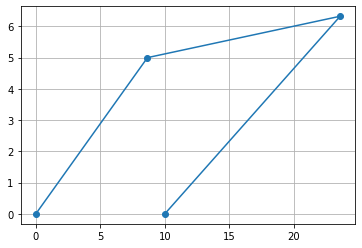

In [51]:
plt.figure()
plt.plot(X1,Y1,'-o')
plt.grid(True)

In [52]:
lista=[1,2,4,5]
sum(lista)

12

In [53]:
def plot4barras(an,bn,cn,dn,thetan):
    dicn = {a:an,b:bn,c:cn,d:dn,theta2:thetan}
    elos = [an,bn,cn,dn]
    elo_maior = max(elos)
    elo_menor = min(elos)
    soma_elos = sum(elos)
    Xn = [0,Ax.subs(dicn).evalf(),Bx1.subs(dicn).evalf(),d.subs(dicn).evalf()]
    Yn = [0,Ay.subs(dicn).evalf(),By1.subs(dicn).evalf(),0]
    plt.plot(Xn,Yn,'-o')
    plt.xlim([-20,30])
    plt.ylim([-20,30])
    plt.grid(True)
    plt.show()
    if (elo_maior+elo_menor)<(sum(elos)-(elo_maior+elo_menor)):
        print('Grashof')
    else:
        print('Não-Grashof')

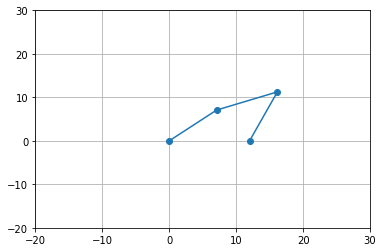

Não-Grashof


In [54]:
plot4barras(10,10,12,12,pi/4)

In [55]:
#from numpy import pi
from ipywidgets import interact

In [56]:
interact(plot4barras,an=(1,20),bn=(1,20),cn=(1,20),dn=(1,20),thetan=(0,4*pi.evalf()))

interactive(children=(IntSlider(value=10, description='an', max=20, min=1), IntSlider(value=10, description='b…

<function __main__.plot4barras(an, bn, cn, dn, thetan)>

In [57]:
from matplotlib import animation
from IPython.display import HTML

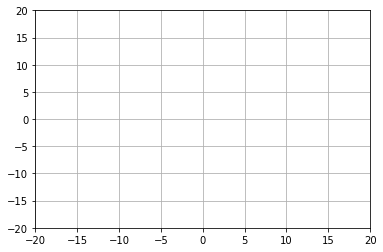

In [58]:

fig, ax = plt.subplots()

ax.set_xlim(( -20, 20))
ax.set_ylim((-20, 20))
ax.grid(True)
line, = ax.plot([], [], 'o-')

In [59]:
import numpy as np
th = np.linspace(0,4*np.pi,720)

In [60]:
def animate(i):
    dic2 = {a:9,b:12,c:15,d:13,theta2:th[i]}
    X1 = [0,Ax.subs(dic2).evalf(),Bx1.subs(dic2).evalf(),d.subs(dic2).evalf()]
    Y1 = [0,Ay.subs(dic2).evalf(),By1.subs(dic2).evalf(),0]
    line.set_data(X1,Y1)
    return (line,)

In [61]:
def init():
    line.set_data([],[])
    return (line,)

In [62]:
anim = animation.FuncAnimation(fig, animate, init_func=init,frames=720, interval=20, blit=True)

In [63]:
HTML(anim.to_html5_video())

**Observação:**
$$\theta_3 = tan^{-1} \left( \dfrac{B_y - A_y}{B_x - A_x} \right) $$
$$\theta_4 = tan^{-1} \left( \dfrac{B_y}{B_x - d} \right)$$

### Representação do laço de vetores nos mecanismos
Essa aproximação tem algumas vantagens na síntese analítica de mecanismos. Também possui vantagens na análise de velocidades e acelerações dos mecanismos. <br>
Esse laço termina em si mesmo fazendo com que a somatória dos vetores ao seu redor seja zero. Os comprimentos dos vetores são os comprimentos dos elos, todos conhecidos. A posição atual do mecanismo é definida pelo ângulo de entrada $\theta_2$ por ser um mecanismo com 1 GDL. Queremos obter os ângulos desconehcidos $\theta_3$ e $\theta_4$.

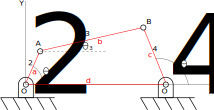

In [64]:
SVG('figs4-6.svg')

$$ \vec{R}_{AO_2} + \vec{R}_{BA} - \vec{R}_{BO_4} - \vec{R}_{O_4O_2} = 0$$

#### Vetores como números complexos

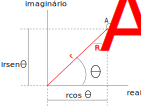

In [65]:
SVG('figs4-7.svg')

Podemos escrever o vetor $\vec{R}_A$ como:
$$\vec{R}_A = r cos \theta + i r sen \theta $$ 
* O número imaginário $i$ é usado como um operador, não como um valor
* Cada multiplicação do vetor $\vec{R}_A$ por $i$ resulta em uma rotação anti-horária de $90^{\circ}$
Uma vantagem de usar a notação dos números complexos para representar vetores planos é obter a **Identidade de Euler**: 
$$ e^{\pm i \theta} = cos \theta \pm i sen \theta $$
Dessa forma, podemos escrever $\vec{R}_A$ como: 
$$\vec{R}_A = r e^{i \theta}$$
Observe que:
$$\dfrac{d e^{i \theta}}{d \theta} = i e^{i \theta} $$

In [66]:
r,theta = symbols('r theta')

In [67]:
RA = r*E**(I*theta)
RA

r*exp(I*theta)

Para simplificar, poderíamos fazer a seguinte importação <br>
```{ .py }
from sympy import E,I
```
Como alternativa, podemos fazer da seguinte forma:

In [68]:
i,e = [I,E]

In [69]:
log(e)

1

In [70]:
e**(i*pi)

-1

In [71]:
i**2

-1

In [72]:
RA = r*e**(i*theta)
RA

r*exp(I*theta)

In [73]:
RA.diff(theta)

I*r*exp(I*theta)

#### Equação vetorial em malha fechada nos mecanismos de quatro barras

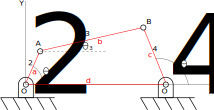

In [74]:
SVG('figs4-6.svg')

$$ \vec{R}_{AO_2} + \vec{R}_{BA} - \vec{R}_{BO_4} - \vec{R}_{O_4O_2} = 0$$

In [75]:
a,b,c,d = symbols('a b c d')
theta1,theta2,theta3,theta4 = symbols('theta1 theta2 theta3 theta4')

In [76]:
RAO2 = a*e**(i*theta2)
RBA = b*e**(i*theta3)
RBO4 = c*e**(i*theta4)
RO4O2 = d*e**(i*theta1)
Eq1 = RAO2 + RBA - RBO4 - RO4O2
Eq1

a*exp(I*theta2) + b*exp(I*theta3) - c*exp(I*theta4) - d*exp(I*theta1)

Observa-se que $\theta_1=0$:

In [77]:
Eq1 = Eq1.subs(theta1,0)
Eq1

a*exp(I*theta2) + b*exp(I*theta3) - c*exp(I*theta4) - d

In [78]:
id_euler = {e**(i*theta2):cos(theta2) + i*sin(theta2),
              e**(i*theta3):cos(theta3) + i*sin(theta3),
             e**(i*theta4):cos(theta4) + i*sin(theta4)}

In [79]:
Eq1 = Eq1.subs(id_euler)
Eq1

a*(I*sin(theta2) + cos(theta2)) + b*(I*sin(theta3) + cos(theta3)) - c*(I*sin(theta4) + cos(theta4)) - d

In [80]:
Eq_real = a*cos(theta2) + b*cos(theta3) - c*cos(theta4) - d
Eq_real

a*cos(theta2) + b*cos(theta3) - c*cos(theta4) - d

In [81]:
Eq_im = a*sin(theta2) + b*sin(theta3) - c*sin(theta4)
Eq_im

a*sin(theta2) + b*sin(theta3) - c*sin(theta4)

In [82]:
bcostheta3 = solve(Eq_real,b*cos(theta3))[0]
bcostheta3

-a*cos(theta2) + c*cos(theta4) + d

In [83]:
Eq(b*cos(theta3),bcostheta3)

Eq(b*cos(theta3), -a*cos(theta2) + c*cos(theta4) + d)

In [84]:
bsentheta3 = solve(Eq_im,b*sin(theta3))[0]
bsentheta3

-a*sin(theta2) + c*sin(theta4)

In [85]:
Eq(b*sin(theta3),bsentheta3)

Eq(b*sin(theta3), -a*sin(theta2) + c*sin(theta4))

In [86]:
b2 = bcostheta3**2 + bsentheta3**2
b2

(-a*sin(theta2) + c*sin(theta4))**2 + (-a*cos(theta2) + c*cos(theta4) + d)**2

In [87]:
Eq(b**2,b2)

Eq(b**2, (-a*sin(theta2) + c*sin(theta4))**2 + (-a*cos(theta2) + c*cos(theta4) + d)**2)

Reorganizando: 


In [88]:
Eq2 = b2.expand() - b**2
Eq2

a**2*sin(theta2)**2 + a**2*cos(theta2)**2 - 2*a*c*sin(theta2)*sin(theta4) - 2*a*c*cos(theta2)*cos(theta4) - 2*a*d*cos(theta2) - b**2 + c**2*sin(theta4)**2 + c**2*cos(theta4)**2 + 2*c*d*cos(theta4) + d**2

Teremos que utilizar uma identidade trigonométrica conhecida como *meia identidade dos ângulos*:
$$ sen \theta_4 = \dfrac{2 tan \left( \dfrac{\theta_4}{2} \right)}{1 + tan^2 \left( \dfrac{\theta_4}{2} \right)} \qquad cos \theta_4 = \dfrac{1 - tan^2 \left( \dfrac{\theta_4}{2} \right)}{1 + tan^2 \left( \dfrac{\theta_4}{2} \right)} $$

In [89]:
mida = {sin(theta4):(2*tan(theta4/2))/(1+(tan(theta4/2))**2),
        cos(theta4):(1-(tan(theta4/2))**2)/(1 +(tan(theta4/2))**2 )}

In [90]:
Eq3 = Eq2.subs(mida)
Eq3 

a**2*sin(theta2)**2 + a**2*cos(theta2)**2 - 2*a*c*(1 - tan(theta4/2)**2)*cos(theta2)/(tan(theta4/2)**2 + 1) - 4*a*c*sin(theta2)*tan(theta4/2)/(tan(theta4/2)**2 + 1) - 2*a*d*cos(theta2) - b**2 + c**2*(1 - tan(theta4/2)**2)**2/(tan(theta4/2)**2 + 1)**2 + 4*c**2*tan(theta4/2)**2/(tan(theta4/2)**2 + 1)**2 + 2*c*d*(1 - tan(theta4/2)**2)/(tan(theta4/2)**2 + 1) + d**2

In [91]:
x = symbols('x')
Eq4 = Eq3.subs(tan(theta4/2),x)
Eq4 = Eq4.simplify()
Eq4

(c**2*(4*x**2 + (x**2 - 1)**2) + 2*c*(x**2 + 1)*(-2*a*x*sin(theta2) + a*(x**2 - 1)*cos(theta2) - d*(x**2 - 1)) + (x**2 + 1)**2*(a**2 - 2*a*d*cos(theta2) - b**2 + d**2))/(x**2 + 1)**2

In [92]:
sol = solve(Eq4,x)

In [93]:
sol[0]

(2*a*c*sin(theta2) - sqrt(-a**4 + 4*a**3*d*cos(theta2) + 2*a**2*b**2 + 4*a**2*c**2*sin(theta2)**2 + 4*a**2*c**2*cos(theta2)**2 - 2*a**2*c**2 - 4*a**2*d**2*cos(theta2)**2 - 2*a**2*d**2 - 4*a*b**2*d*cos(theta2) - 4*a*c**2*d*cos(theta2) + 4*a*d**3*cos(theta2) - b**4 + 2*b**2*c**2 + 2*b**2*d**2 - c**4 + 2*c**2*d**2 - d**4))/(a**2 + 2*a*c*cos(theta2) - 2*a*d*cos(theta2) - b**2 + c**2 - 2*c*d + d**2)

In [94]:
sol[1]

(2*a*c*sin(theta2) + sqrt(-a**4 + 4*a**3*d*cos(theta2) + 2*a**2*b**2 + 4*a**2*c**2*sin(theta2)**2 + 4*a**2*c**2*cos(theta2)**2 - 2*a**2*c**2 - 4*a**2*d**2*cos(theta2)**2 - 2*a**2*d**2 - 4*a*b**2*d*cos(theta2) - 4*a*c**2*d*cos(theta2) + 4*a*d**3*cos(theta2) - b**4 + 2*b**2*c**2 + 2*b**2*d**2 - c**4 + 2*c**2*d**2 - d**4))/(a**2 + 2*a*c*cos(theta2) - 2*a*d*cos(theta2) - b**2 + c**2 - 2*c*d + d**2)

In [95]:
theta4_1 = 2*atan(sol[0])
theta4_1

2*atan((2*a*c*sin(theta2) - sqrt(-a**4 + 4*a**3*d*cos(theta2) + 2*a**2*b**2 + 4*a**2*c**2*sin(theta2)**2 + 4*a**2*c**2*cos(theta2)**2 - 2*a**2*c**2 - 4*a**2*d**2*cos(theta2)**2 - 2*a**2*d**2 - 4*a*b**2*d*cos(theta2) - 4*a*c**2*d*cos(theta2) + 4*a*d**3*cos(theta2) - b**4 + 2*b**2*c**2 + 2*b**2*d**2 - c**4 + 2*c**2*d**2 - d**4))/(a**2 + 2*a*c*cos(theta2) - 2*a*d*cos(theta2) - b**2 + c**2 - 2*c*d + d**2))

In [96]:
dic1

{a: 10, b: 15, c: 15, d: 10, theta2: pi/6}

In [97]:
theta4_1.subs(dic1).evalf()

0.435213273165934

Para obter $\theta_3$ devemos proceder de maneira similar.

## 4.6 Solução para Análise de Posições no Mecanismo Biela-Manivela

A mesma análise feita para o vetor laço utilizada para a junta pinada de quatro barras pode ser aplicada ao mecanismo.

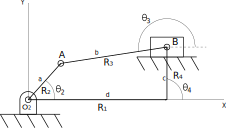

In [98]:
SVG('figs4-8.svg')

$$\vec{R}_2 + \vec{R}_3 - \vec{R}_4 - \vec{R}_1 = 0$$

In [99]:
R2 = a*e**(i*theta2)
R3 = b*e**(i*theta3)
R4 = c*e**(i*theta4)
R1 = d*e**(i*theta1)

In [100]:
eq1 = R2 - R3 - R4 - R1
eq1

a*exp(I*theta2) - b*exp(I*theta3) - c*exp(I*theta4) - d*exp(I*theta1)

Observa-se que $\theta_1 = 0$ e $\theta_4 = 90^{\circ}$

In [101]:
eq1 = eq1.subs(theta1,0)
eq1 = eq1.subs(theta4,pi/2)
eq1

a*exp(I*theta2) - b*exp(I*theta3) - I*c - d

In [102]:
eq2 = eq1.subs(id_euler)
eq2

a*(I*sin(theta2) + cos(theta2)) - b*(I*sin(theta3) + cos(theta3)) - I*c - d

In [103]:
eq2_real = a*cos(theta2) - b*cos(theta3) -d
eq2_real

a*cos(theta2) - b*cos(theta3) - d

In [104]:
eq2_im = a*sin(theta2) - b*sin(theta3) -c
eq2_im

a*sin(theta2) - b*sin(theta3) - c

In [105]:
th3 = solve(eq2_im,theta3)
th3

[pi - asin((a*sin(theta2) - c)/b), asin((a*sin(theta2) - c)/b)]

Note que existem novamente duas soluções correspondentes aos dois circuitos do mecanismo. A função *arco seno* possui duas soluções.

In [106]:
th3 = th3[1]
th3

asin((a*sin(theta2) - c)/b)

In [107]:
dsol = solve(eq2_real,d)
dsol

[a*cos(theta2) - b*cos(theta3)]

In [108]:
dsol = dsol[0]
dsol

a*cos(theta2) - b*cos(theta3)

In [109]:
dsol = dsol.subs(theta3,th3)
dsol

a*cos(theta2) - b*sqrt(1 - (a*sin(theta2) - c)**2/b**2)

## 4.7 Ângulos de Transmissão

O ângulo de transmissão $\mu$ é definido como o *ângulo entre o elo de saída e o acoplador*. <br>
Iremos expandir essa definição para representar o ângulo entre quaisquer elos em um mecanismo.  -> O ângulo entre qualquer elo de saída e o acoplador que o movimenta é um ângulo de transmissão. 
<br>
Agora que desenvolvemos as expressões analíticas para os ângulos de todos os elos do mecanismo, fica fácil determinar algebricamente o ângulo de transmissão. Ele é apenas a diferença entre os ângulos dos dois elos.<br>
Por convenção, tomamos o valor absoluto da diferença e o forçamos a ser um ângulo agudo. 
$$\theta_{trans} = | \theta_3 - \theta_4 |$$
se $\theta_{trans} > \pi/2$ então $\mu = \pi - \theta_{trans}$ caso contrário $\mu = \theta_{trans}$

In [110]:
def ang_trans(th3,th4):
    th_trans = abs(th3 - th4)
    pi = 3.14159265358979
    if th_trans > (pi)/2:
        return pi - th_trans
    else:
        return th_trans

Esse cálculo pode ser feito para qualquer junta de um mecanismo, utilizando os ângulos dos elos apropriados.

### Valores extremos do ângulo de transmissão
Para um mecanismo manivela de quatro barras de Grashof, o valor mínimo do ângulo de transmissão ocorrerá quando a manivela for colinear ao elo terra. Os valores do ângulo de transmissão nessas posições são facilmente calculados pela lei dos cossenos. <br>
Dependendo da geometria do mecanismo, o valor mínimo de transmissão $\mu_min$ poderá ocorrer quando os elos 1 e 2 forem colineares e sobrepostos, ou quando os elos 1 e 2 forem colineares e não sobrepostos.

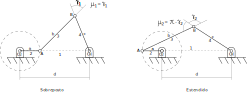

In [111]:
SVG('figs4-9.svg')

Para o caso sobreposto: 
$$\mu_1 = \gamma_1 = arccos \left(\dfrac{b^2 + c^2 - (d+a)^2}{2bc} \right) $$
Para o caso estendido: 
$$ \mu_2 = \gamma_2 = arccos \left( \dfrac{b^2 + c^2 - (d+a)^2}{2bc} \right) $$

O ângulo mínimo de transmissão $\mu_{min}$ em um mecanimos manivela seguidor de Grashof é o menor dos valores de $\mu_1$ e $\mu_2$.

Para um mecanismo **duplo seguidor de Grashof**, o ângulo de transmissão pode variar de $0^\circ$ a $90^\circ$ porque o acoplador pode fazer uma revolução completa em relação aos outros elos. <br>
Para um mecanismo **triplo seguidor não Grashof**, o ângulo de transmissão será $0^\circ$ nos pontos de singularidade que ocorrem quando o seguidor de saída $c$ e o acoplador $b$ forem colinerares. Nos outros pontos de singularidade, quando o seguidor de entrada $a$ e o acoplador $b$ forem colineares, o ângulo de transmissão pode ser calculado pela lei dos cossenos: <br>
quando: $\qquad \nu=0,$
$$ \mu = arccos \left( \dfrac{(a+b)^{2} + c^2 - d^2}{2c(a+b)} \right) $$
Esse não é o menor valor que o ângulo de transmissão $\mu$ pode obter em um triplo seguidor, já que ele esse valor é zero.

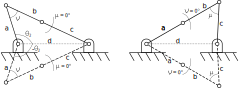

In [112]:
SVG('figs4-10.svg')

 [Voltar para o capítulo anterior](Mecs3.ipynb)     $\qquad$   [Avançar para o próximo capítulo](Mecs5.ipynb)